Import the required packages with their customary aliases as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

Use the `%matplotlib inline` magic command so that your plots show in the notebook _without_ having to call `plt.show()` every time.

In [2]:
%matplotlib inline

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first 6 rows. Then do the same with internet.

In [3]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv', nrows = 6868)

In [4]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


In [5]:
internet_df=pd.read_csv('../data/internet_use.csv', nrows = 4495)

In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


Look at the shape of each DataFrame - how many rows? How many columns?

In [7]:
internet_df.shape

(4495, 4)

In [8]:
gdp_df.shape

(6868, 4)

Take a look at the datatypes for the columns in each DataFrame.

In [9]:
internet_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [10]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [12]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.

In [13]:
internet_columns = internet_df.drop(columns = ['Value Footnotes'])

In [14]:
internet_columns.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [15]:
gdp_columns = gdp_df.drop(columns = ['Value Footnotes'])

In [16]:
gdp_columns.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’. Do the same for internet.

In [17]:
internet_columns.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [18]:
internet_columns.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [19]:
gdp_columns.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [20]:
gdp_columns.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


Merge the two DataFrames to one. Merge **all rows** from each of the

In [21]:
gdp_and_internet_use = pd.merge(gdp_columns, internet_columns)

In [22]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
1,Afghanistan,2013,2116.465454,5.900000
2,Afghanistan,2012,2075.491747,5.454545
3,Afghanistan,2011,1904.559799,5.000000
4,Afghanistan,2010,1957.029338,4.000000
...,...,...,...,...
3453,Zimbabwe,1997,3580.048793,0.033080
3454,Zimbabwe,1996,3520.430146,0.016790
3455,Zimbabwe,1995,3226.413930,0.007684
3456,Zimbabwe,1994,3263.934978,0.001739


Look at the first and last five rows of your new DataFrame to confirm it merged correctly.

In [23]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
1,Afghanistan,2013,2116.465454,5.900000
2,Afghanistan,2012,2075.491747,5.454545
3,Afghanistan,2011,1904.559799,5.000000
4,Afghanistan,2010,1957.029338,4.000000


In [24]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3453,Zimbabwe,1997,3580.048793,0.033080
3454,Zimbabwe,1996,3520.430146,0.016790
3455,Zimbabwe,1995,3226.413930,0.007684
3456,Zimbabwe,1994,3263.934978,0.001739
3457,Zimbabwe,1990,3324.348171,0.000000


Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [25]:
year_list = [2004, 2009, 2014]
years = gdp_and_internet_use.query("Year in @year_list")
years

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.390000
5,Afghanistan,2009,1758.904043,3.550000
10,Afghanistan,2004,1200.278256,0.105809
13,Albania,2014,11623.866679,60.100000
18,Albania,2009,10346.864199,41.200000
...,...,...,...,...
3419,Zambia,2009,2917.516220,6.310000
3424,Zambia,2004,2261.766537,2.013550
3436,Zimbabwe,2014,2955.240287,19.890000
3441,Zimbabwe,2009,1925.364381,11.360000


Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [26]:
giu_2004 = gdp_and_internet_use.query("Year == 2004")
giu_2004

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2004,1200.278256,0.105809
23,Albania,2004,7604.838002,2.420388
44,Algeria,2004,10058.435939,4.634475
66,Angola,2004,5593.241537,0.464815
86,Antigua and Barbuda,2004,18745.681534,24.266544
...,...,...,...,...
3361,Uruguay,2004,12479.966871,17.063098
3383,Uzbekistan,2004,3221.189333,2.593725
3404,Vanuatu,2004,2792.356252,4.746603
3424,Zambia,2004,2261.766537,2.013550


In [27]:
giu_2009 = gdp_and_internet_use.query("Year == 2009")
giu_2009

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2009,1758.904043,3.550000
18,Albania,2009,10346.864199,41.200000
39,Algeria,2009,10782.361398,11.230000
61,Angola,2009,7643.493749,6.000000
81,Antigua and Barbuda,2009,20046.839017,42.000000
...,...,...,...,...
3356,Uruguay,2009,16477.823860,41.800000
3378,Uzbekistan,2009,4446.863606,17.058216
3399,Vanuatu,2009,3270.529800,7.500000
3419,Zambia,2009,2917.516220,6.310000


In [28]:
giu_2014 = gdp_and_internet_use.query("Year == 2014")
giu_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,2102.385234,6.39
13,Albania,2014,11623.866679,60.10
34,Algeria,2014,11512.705405,18.09
56,Angola,2014,8239.828837,21.26
76,Antigua and Barbuda,2014,18104.241470,64.00
...,...,...,...,...
3351,Uruguay,2014,20582.168953,61.46
3373,Uzbekistan,2014,5764.492705,43.55
3394,Vanuatu,2014,3116.077025,18.80
3414,Zambia,2014,3450.046561,17.34


Which country had the highest percentage of internet users in 2014? What was the percentage? Iceland, 98.16

In [29]:
giu_2014.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1381,Iceland,2014,49652.149500,98.16
372,Bermuda,2014,77361.104881,96.80
2296,Norway,2014,62589.373548,96.30
854,Denmark,2014,52214.537753,95.99
1798,Luxembourg,2014,108760.916030,94.67
...,...,...,...,...
2122,Myanmar,2014,4020.037369,2.10
2256,Niger,2014,1127.615541,1.95
1261,Guinea,2014,2061.760973,1.72
540,Burundi,2014,886.235777,1.38


Which country had the lowest percentage of internet users in 2014? What was the percentage? Timor-Leste, 1.14

In [30]:
giu_2014.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3087,Timor-Leste,2014,3264.568070,1.14
540,Burundi,2014,886.235777,1.38
1261,Guinea,2014,2061.760973,1.72
2256,Niger,2014,1127.615541,1.95
2728,Sierra Leone,2014,1997.511853,2.10
...,...,...,...,...
1798,Luxembourg,2014,108760.916030,94.67
854,Denmark,2014,52214.537753,95.99
2296,Norway,2014,62589.373548,96.30
372,Bermuda,2014,77361.104881,96.80


Which country had the highest percentage of internet users in 2004? What was the percentage? Sweden, 83.89

In [31]:
giu_2004.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2985,Sweden,2004,44496.023401,83.890000
1391,Iceland,2004,45145.545658,83.880000
864,Denmark,2004,50607.628971,80.930000
2306,Norway,2004,60893.410993,77.690000
1063,Finland,2004,43760.279146,72.390000
...,...,...,...,...
1019,Ethiopia,2004,793.093786,0.155335
10,Afghanistan,2004,1200.278256,0.105809
3035,Tajikistan,2004,1737.743630,0.077480
1759,Liberia,2004,1181.546158,0.031011


Which country had the lowest percentage of internet users in 2004? What was the percentage? Myanmar, 0.02

In [32]:
giu_2004.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2132,Myanmar,2004,1696.881760,0.024337
1759,Liberia,2004,1181.546158,0.031011
3035,Tajikistan,2004,1737.743630,0.077480
10,Afghanistan,2004,1200.278256,0.105809
1019,Ethiopia,2004,793.093786,0.155335
...,...,...,...,...
1063,Finland,2004,43760.279146,72.390000
2306,Norway,2004,60893.410993,77.690000
864,Denmark,2004,50607.628971,80.930000
1391,Iceland,2004,45145.545658,83.880000


Which country had the highest percentage of internet users in 2009? What was the percentage? Iceland, 93.00

In [33]:
giu_2009.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1386,Iceland,2009,48177.084123,93.000000
2301,Norway,2009,61886.564498,92.080000
2980,Sweden,2009,45638.035577,91.000000
2190,Netherlands,2009,51772.424928,89.630000
1803,Luxembourg,2009,104932.811953,87.310000
...,...,...,...,...
1014,Ethiopia,2009,1150.206179,0.540000
570,Cambodia,2009,2603.583778,0.530000
2733,Sierra Leone,2009,1372.392285,0.260000
2127,Myanmar,2009,2874.780227,0.220000


Which country had the lowest percentage of internet users in 2009? What was the percentage? Timor-Leste, 0.185

In [34]:
giu_2009.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3092,Timor-Leste,2009,2724.770973,0.185252
2127,Myanmar,2009,2874.780227,0.220000
2733,Sierra Leone,2009,1372.392285,0.260000
570,Cambodia,2009,2603.583778,0.530000
1014,Ethiopia,2009,1150.206179,0.540000
...,...,...,...,...
1803,Luxembourg,2009,104932.811953,87.310000
2190,Netherlands,2009,51772.424928,89.630000
2980,Sweden,2009,45638.035577,91.000000
2301,Norway,2009,61886.564498,92.080000


Which country had the highest gdp per capita in 2014? What was the gdp per capita? Luxembourg, 108,760.92

In [35]:
giu_2014.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1798,Luxembourg,2014,108760.916030,94.67
2542,Qatar,2014,95578.416973,91.49
2751,Singapore,2014,87808.663157,82.00
372,Bermuda,2014,77361.104881,96.80
627,Cayman Islands,2014,66207.447230,74.10
...,...,...,...,...
3098,Togo,2014,1404.132938,5.70
2102,Mozambique,2014,1217.090210,5.94
2256,Niger,2014,1127.615541,1.95
1842,Malawi,2014,1027.208496,5.83


Which country had the lowest gdp per capita in 2014? What was the gdp per capita? Burundi, 886.24

In [36]:
giu_2014.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
540,Burundi,2014,886.235777,1.38
1842,Malawi,2014,1027.208496,5.83
2256,Niger,2014,1127.615541,1.95
2102,Mozambique,2014,1217.090210,5.94
3098,Togo,2014,1404.132938,5.70
...,...,...,...,...
627,Cayman Islands,2014,66207.447230,74.10
372,Bermuda,2014,77361.104881,96.80
2751,Singapore,2014,87808.663157,82.00
2542,Qatar,2014,95578.416973,91.49


Which country had the highest gdp per capita in 2009? What was the gdp per capita? Luxembourg, 104,932.81

In [37]:
giu_2009.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1803,Luxembourg,2009,104932.811953,87.31
377,Bermuda,2009,89961.982744,83.25
2547,Qatar,2009,89954.519993,53.10
2643,San Marino,2009,76736.328963,54.21
632,Cayman Islands,2009,70300.334857,64.50
...,...,...,...,...
1014,Ethiopia,2009,1150.206179,0.54
2261,Niger,2009,992.409977,0.76
2107,Mozambique,2009,991.323181,2.68
1847,Malawi,2009,932.867635,1.07


Which country had the lowest gdp per capita in 2009? What was the gdp per capita? Burundi, 831.56

In [38]:
giu_2009.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
545,Burundi,2009,831.564131,0.90
1847,Malawi,2009,932.867635,1.07
2107,Mozambique,2009,991.323181,2.68
2261,Niger,2009,992.409977,0.76
1014,Ethiopia,2009,1150.206179,0.54
...,...,...,...,...
632,Cayman Islands,2009,70300.334857,64.50
2643,San Marino,2009,76736.328963,54.21
2547,Qatar,2009,89954.519993,53.10
377,Bermuda,2009,89961.982744,83.25


Which country had the highest gdp per capita in 2004? What was the gdp per capita? Luxembourg, 102,708.21

In [39]:
giu_2004.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1808,Luxembourg,2004,102708.212547,65.880000
3290,United Arab Emirates,2004,97758.023345,30.131296
2552,Qatar,2004,93748.301216,20.701648
382,Bermuda,2004,90195.811033,60.990867
2648,San Marino,2004,80391.828516,50.566343
...,...,...,...,...
2266,Niger,2004,929.883920,0.189934
550,Burundi,2004,817.460585,0.349060
1019,Ethiopia,2004,793.093786,0.155335
2112,Mozambique,2004,792.727155,0.679448


Which country had the lowest gdp per capita in 2004? What was the gdp per capita? Malawi, 775.35

In [40]:
giu_2004.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1852,Malawi,2004,775.346132,0.347505
2112,Mozambique,2004,792.727155,0.679448
1019,Ethiopia,2004,793.093786,0.155335
550,Burundi,2004,817.460585,0.349060
2266,Niger,2004,929.883920,0.189934
...,...,...,...,...
2648,San Marino,2004,80391.828516,50.566343
382,Bermuda,2004,90195.811033,60.990867
2552,Qatar,2004,93748.301216,20.701648
3290,United Arab Emirates,2004,97758.023345,30.131296


Create some scatterplots:  

a.  2004 Percent Using the Internet vs GDP Per Capita 

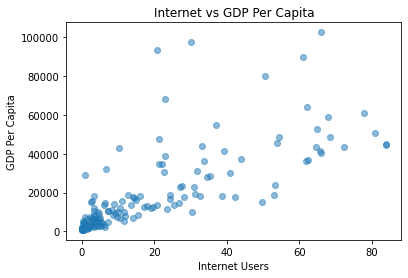

In [41]:
plt.scatter(giu_2004.Internet_Users_Pct, giu_2004.GDP_Per_Capita, alpha = 0.5)
plt.title("Internet vs GDP Per Capita")
plt.xlabel("Internet Users")
plt.ylabel("GDP Per Capita")
plt.show()

b.	2009 Percent Using the Internet vs GDP Per Capita 

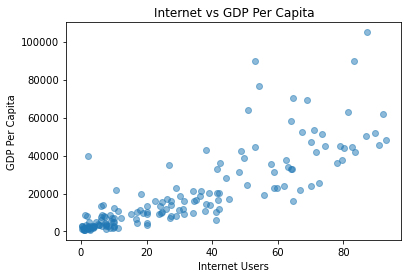

In [42]:
plt.scatter(giu_2009.Internet_Users_Pct, giu_2009.GDP_Per_Capita, alpha = 0.5)
plt.title("Internet vs GDP Per Capita")
plt.xlabel("Internet Users")
plt.ylabel("GDP Per Capita")
plt.show()

c.	2014 Percent Using the Internet vs GDP Per Capita 

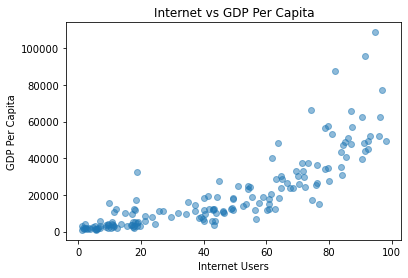

In [43]:
plt.scatter(giu_2014.Internet_Users_Pct, giu_2014.GDP_Per_Capita, alpha = 0.5)
plt.title("Internet vs GDP Per Capita")
plt.xlabel("Internet Users")
plt.ylabel("GDP Per Capita")
plt.show()

Are there differences across years? What do the plots tell you about any relationship between these two variables? As the years increase, the data becomes more compact and there arent as many outliers on the upward trend. The higher the gdp per capita, the higher the percentage of internet users. 

Look at the distribution of gdp per capita values for 2014. Is it unimodal? Yes

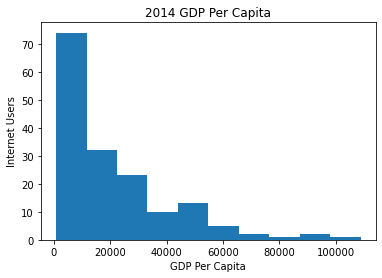

In [44]:
plt.hist(giu_2014["GDP_Per_Capita"])
plt.title("2014 GDP Per Capita")
plt.ylabel("Internet Users")
plt.xlabel("GDP Per Capita")
plt.show()

Look at the distribution of Internet Use for 2014. Is it unimodal? No

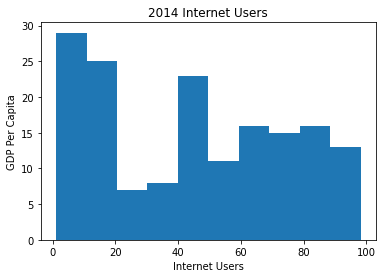

In [45]:
plt.hist(giu_2014["Internet_Users_Pct"])
plt.title("2014 Internet Users")
plt.xlabel("Internet Users")
plt.ylabel("GDP Per Capita")
plt.show()

What are the top 5 countries in terms of internet use in 2014? Iceland, Bermuda, Norway, Denmark, Luxembourg

In [46]:
iu_top_14 = giu_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head(5)

In [47]:
iu_top_14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1381,Iceland,2014,49652.149500,98.16
372,Bermuda,2014,77361.104881,96.80
2296,Norway,2014,62589.373548,96.30
854,Denmark,2014,52214.537753,95.99
1798,Luxembourg,2014,108760.916030,94.67


In [48]:
countries_list = ["Iceland", "Bermuda", "Norway", "Denmark", "Luxembourg"]
top_int_countries = years.query("Country in @countries_list")
top_int_countries

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
372,Bermuda,2014,77361.104881,96.800000
377,Bermuda,2009,89961.982744,83.250000
382,Bermuda,2004,90195.811033,60.990867
854,Denmark,2014,52214.537753,95.990000
859,Denmark,2009,50274.075696,86.840000
864,Denmark,2004,50607.628971,80.930000
1381,Iceland,2014,49652.149500,98.160000
1386,Iceland,2009,48177.084123,93.000000
1391,Iceland,2004,45145.545658,83.880000
1798,Luxembourg,2014,108760.916030,94.670000


Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Bermuda.

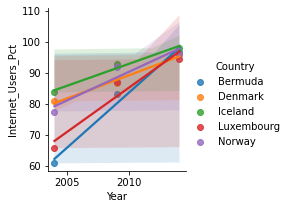

In [49]:
graph = sns.FacetGrid(top_int_countries, hue = "Country") 
graph.map(sns.regplot, "Year", "Internet_Users_Pct").add_legend()
plt.show()

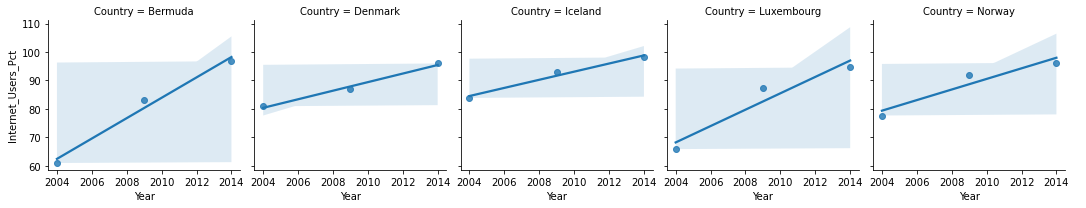

In [50]:
graph = sns.FacetGrid(top_int_countries, col = "Country") 
graph.map(sns.regplot, "Year", "Internet_Users_Pct").add_legend()
plt.show()

Look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use? Timore-Leste

In [51]:
iu_bot_14 = giu_2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head(5)
iu_bot_14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3087,Timor-Leste,2014,3264.568070,1.14
540,Burundi,2014,886.235777,1.38
1261,Guinea,2014,2061.760973,1.72
2256,Niger,2014,1127.615541,1.95
2728,Sierra Leone,2014,1997.511853,2.10


In [52]:
bot_countries_list = ["Timor-Leste", "Burundi", "Guinea", "Niger", "Sierra Leone"]
bot_int_countries = years.query("Country in @bot_countries_list")
bot_int_countries

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
540,Burundi,2014,886.235777,1.380000
545,Burundi,2009,831.564131,0.900000
550,Burundi,2004,817.460585,0.349060
1261,Guinea,2014,2061.760973,1.720000
1266,Guinea,2009,1825.576637,0.940000
1271,Guinea,2004,1778.079082,0.508819
2256,Niger,2014,1127.615541,1.950000
2261,Niger,2009,992.409977,0.760000
2266,Niger,2004,929.883920,0.189934
2728,Sierra Leone,2014,1997.511853,2.100000


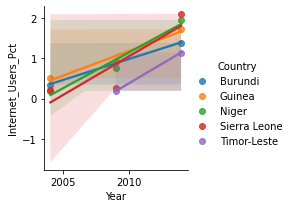

In [53]:
graph = sns.FacetGrid(bot_int_countries, hue = "Country") 
graph.map(sns.regplot, "Year", "Internet_Users_Pct").add_legend()
plt.show()

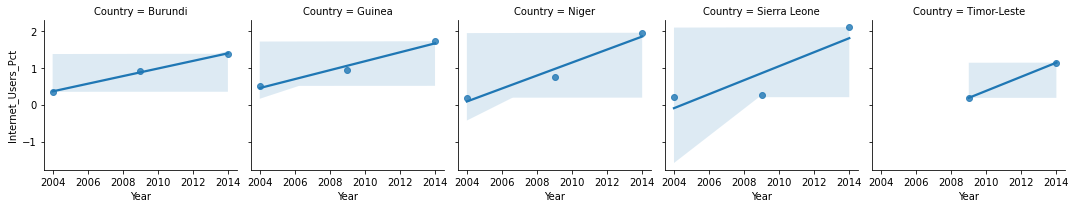

In [54]:
graph = sns.FacetGrid(bot_int_countries, col = "Country") 
graph.map(sns.regplot, "Year", "Internet_Users_Pct").add_legend()
plt.show()

Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita.

In [55]:
g_top_14 = giu_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head(5)
g_top_14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1798,Luxembourg,2014,108760.916030,94.67
2542,Qatar,2014,95578.416973,91.49
2751,Singapore,2014,87808.663157,82.00
372,Bermuda,2014,77361.104881,96.80
627,Cayman Islands,2014,66207.447230,74.10


In [56]:
gtop_countries_list = ["Luxembourg", "Qatar", "Singapore", "Bermuda", "Cayman Islands"]
top_gdp_countries = years.query("Country in @gtop_countries_list")
top_gdp_countries

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
372,Bermuda,2014,77361.104881,96.800000
377,Bermuda,2009,89961.982744,83.250000
382,Bermuda,2004,90195.811033,60.990867
627,Cayman Islands,2014,66207.447230,74.100000
632,Cayman Islands,2009,70300.334857,64.500000
1798,Luxembourg,2014,108760.916030,94.670000
1803,Luxembourg,2009,104932.811953,87.310000
1808,Luxembourg,2004,102708.212547,65.880000
2542,Qatar,2014,95578.416973,91.490000
2547,Qatar,2009,89954.519993,53.100000


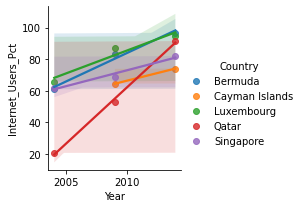

In [57]:
graph = sns.FacetGrid(top_gdp_countries, hue = "Country") 
graph.map(sns.regplot, "Year", "Internet_Users_Pct").add_legend()
plt.show()

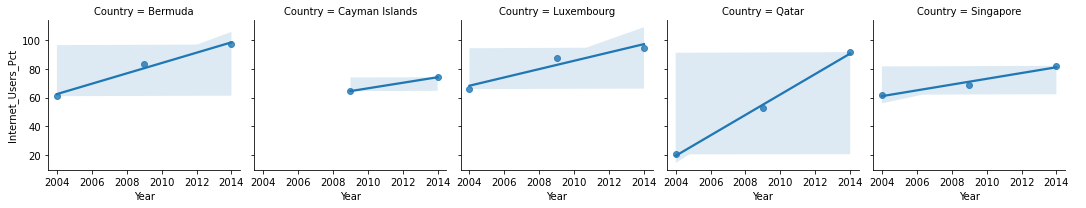

In [58]:
graph = sns.FacetGrid(top_gdp_countries, col = "Country") 
graph.map(sns.regplot, "Year", "Internet_Users_Pct").add_legend()
plt.show()

Look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [59]:
g_bot_14 = giu_2014.sort_values(by = 'GDP_Per_Capita', ascending = True).head(5)
g_bot_14

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
540,Burundi,2014,886.235777,1.38
1842,Malawi,2014,1027.208496,5.83
2256,Niger,2014,1127.615541,1.95
2102,Mozambique,2014,1217.090210,5.94
3098,Togo,2014,1404.132938,5.70


In [60]:
gbot_countries_list = ["Malawi", "Burundi", "Mozambique", "Niger", "Togo"]
bot_gdp_countries = years.query("Country in @gbot_countries_list")
bot_gdp_countries

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
540,Burundi,2014,886.235777,1.380000
545,Burundi,2009,831.564131,0.900000
550,Burundi,2004,817.460585,0.349060
1842,Malawi,2014,1027.208496,5.830000
1847,Malawi,2009,932.867635,1.070000
1852,Malawi,2004,775.346132,0.347505
2102,Mozambique,2014,1217.090210,5.940000
2107,Mozambique,2009,991.323181,2.680000
2112,Mozambique,2004,792.727155,0.679448
2256,Niger,2014,1127.615541,1.950000


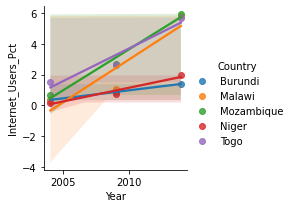

In [61]:
graph = sns.FacetGrid(bot_gdp_countries, hue = "Country") 
graph.map(sns.regplot, "Year", "Internet_Users_Pct").add_legend()
plt.show()

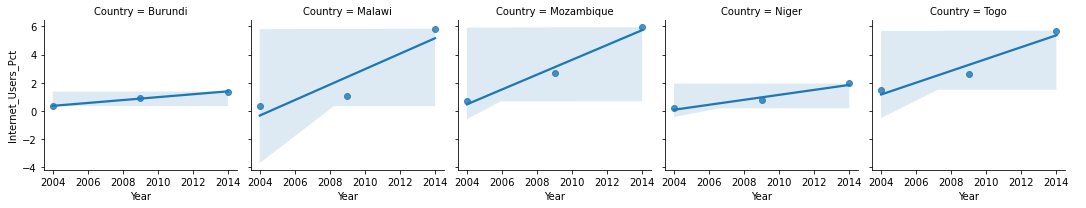

In [62]:
graph = sns.FacetGrid(bot_gdp_countries, col = "Country") 
graph.map(sns.regplot, "Year", "Internet_Users_Pct").add_legend()
plt.show()

Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings? Timor-Leste has only 2 points so it seems like they didn't have internet until 2009 just like the Cayman Islands. It's interesting because this seemed to be a hinderance on Timor-Leste but didn't have a negative impact on the Cayman Islands. Based on research Timor suffered from a lack of physical access to technology and lack of resources. In the Cayman Islands, there was a security issue that may have delayed their expansion but they had adeuate access to resources and technology.  

Bonus: Download another data set from the UN data and explore.

In [63]:
abort_df=pd.read_csv('../data/abortion_rates.csv', nrows = 61)
abort_df

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Albania,Female 15-44 yr,2003,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",9.6,NaN
1,Armenia,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",13.9,NaN
2,Australia,Female 15-44 yr,2003,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",19.7,1.0
3,Austria,Female 15-44 yr,2001,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",1.3,NaN
4,Azerbaijan,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",9.0,NaN
...,...,...,...,...,...,...,...
56,Ukraine,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",27.5,NaN
57,United Kingdom,Female 15-44 yr,2005,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",17.0,5.0
58,United States of America,Female 15-44 yr,2003,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",20.8,6.0
59,Uzbekistan,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",7.8,NaN


In [64]:
abort_df.shape

(61, 7)

In [65]:
abort_columns = abort_df.drop(columns = ['Value Footnotes'])
abort_columns

,Country or Area,Subgroup,Year,Source,Unit,Value
0,Albania,Female 15-44 yr,2003,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",9.6
1,Armenia,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",13.9
2,Australia,Female 15-44 yr,2003,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",19.7
3,Austria,Female 15-44 yr,2001,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",1.3
4,Azerbaijan,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",9.0
...,...,...,...,...,...,...
56,Ukraine,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",27.5
57,United Kingdom,Female 15-44 yr,2005,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",17.0
58,United States of America,Female 15-44 yr,2003,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",20.8
59,Uzbekistan,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",7.8


In [66]:
abort_columns.sort_values(by = 'Value', ascending = False)

,Country or Area,Subgroup,Year,Source,Unit,Value
45,Russian Federation,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",53.7
60,Vietnam,Female 15-44 yr,2000,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",35.2
29,Kazakhstan,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",35.0
17,Estonia,Female 15-44 yr,2005,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",33.3
6,Belarus,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",31.7
...,...,...,...,...,...,...
41,Portugal,Female 15-44 yr,2002,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",0.2
34,Mexico,Female 15-44 yr,2003,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",0.1
39,Panama,Female 15-44 yr,2000,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",0.0
40,Poland,Female 15-44 yr,2004,UNPD_World Abortion Policies_2007,"Abortions per 1,000 women",0.0


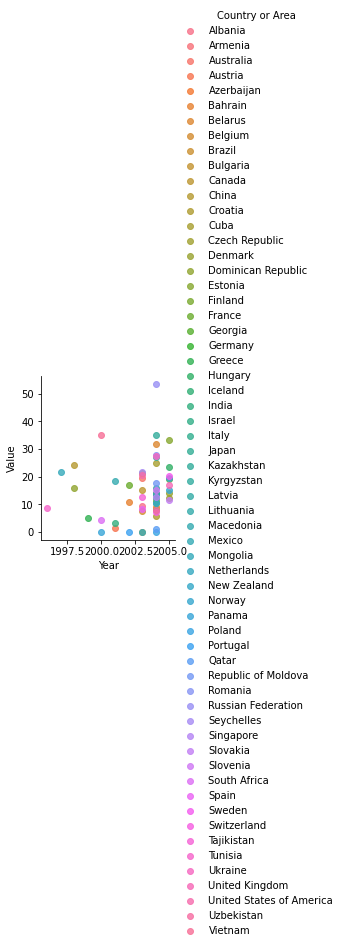

In [70]:
graph = sns.FacetGrid(abort_columns, hue = "Country or Area") 
graph.map(sns.regplot, "Year", "Value").add_legend()
plt.show()

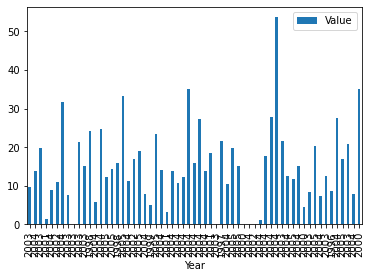

In [71]:
abort_columns.plot.bar(x="Year", y="Value")
plt.show()